# Loan status Prediction
To predict where you are eligible for the loan or not with the help of your submitted information


# Problem Statement:
Finance company deals in all kinds of home loans. They have a presence across all urban, semi-urban and rural areas. The customer first applies for a home loan and after that, the company validates the customer eligibility for the loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out online application forms. These details are Gender, Marital Status, Education, number of Dependents, Income, Loan Amount, Credit History, and others.

To automate this process, they have provided a dataset to identify the customer segments that are eligible for loan amounts so that they can specifically target these customers.

### What is Loan?:
- **Loan**: The term loan refers to a type of credit vehicle in which a sum of money is lent to another party in exchange for future repayment of the value or principal amount. In many cases, the lender also adds interest and/or finance charges to the principal value which the borrower must repay in addition to the principal balance. Loans may be for a specific, one-time amount, or they may be available as an open-ended line of credit up to a specified limit. Loans come in many different forms including secured, unsecured, commercial, and personal loans.

# About the Data:
- Attributes:


![fields](https://lh4.googleusercontent.com/Toh_V2T2hPde7_CwbNHbO4oiAk01LykBuVEd86fSQgqiLWu4CHGavONhvBHfXBMCW9Q8S32WmiI5bge5uIZ_70KWbhu_x8Vl-VCF4PC1BkyDn7v4m1q0hfRiF4NfL4U9mdpGSdoA)

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
sns.set()
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [2]:
data = pd.read_csv('../input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv')
print("Top 5 rows from the data: ")
data.head()

Top 5 rows from the data: 


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


---
* _What are the features of dataset?_
---

In [3]:
# creating a function which will give us features from the dataset
def data_feature(dataset):
    print("SHAPE OF THE DATA: ")
    print(dataset.shape)
    print("-"*90)
    print("INFORMATION OF THE DATA: ")
    print(dataset.info())
    print("-"*90)
    print("NUMBER OF NULL VALUES PRESENT IN THE DATA: ")
    print(dataset.isnull().sum())
    print("-"*90)
    print("COLUMN NAMES OF THE DATA: ")
    print(dataset.columns)
    print("-"*90)
    
data_feature(data)
    

SHAPE OF THE DATA: 
(614, 13)
------------------------------------------------------------------------------------------
INFORMATION OF THE DATA: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1)

**Observations**:
1. The data is no that large.
2. Our target class is in the form of **Binary(i.e. YES or NO, also 0 or 1)**.
3. Data contains some null values.
4. Data has 12 columns and a column called **LOAN STATUS** is our target column

## Exploratory Data Analysis

- Statistical Description

In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Univariate Analysis
It is the simplest form of analyzing data where we examine each variable individually. For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, probability density plots can be used to look at the distribution of the variable.

In [5]:
# Analyzing the target variable
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [6]:
# Let's normalize and check the proportion
data['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

- 422 loan requests has been approved out of 614 where percentage of approval is (69%)

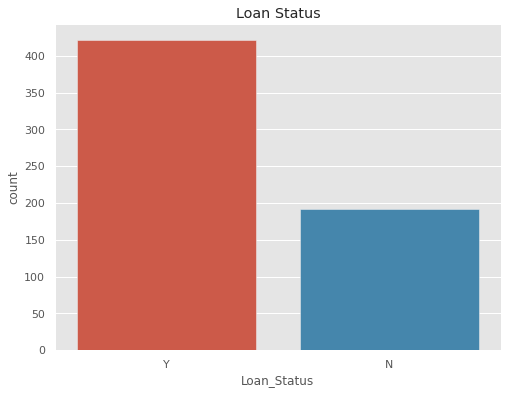

In [7]:
# Representing each category using visualization
plt.figure(figsize=(8,6))
sns.countplot(x='Loan_Status', data=data)
plt.title('Loan Status')
plt.show()

### Visualizing each variable 
- Different types of variables in our dataset are Categorical, ordinal and numerical.

*Categorical features:* These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

*Ordinal features:* Variables in categorical features having some order involved (Dependents, Education, Property_Area)

*Numerical features:* These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term

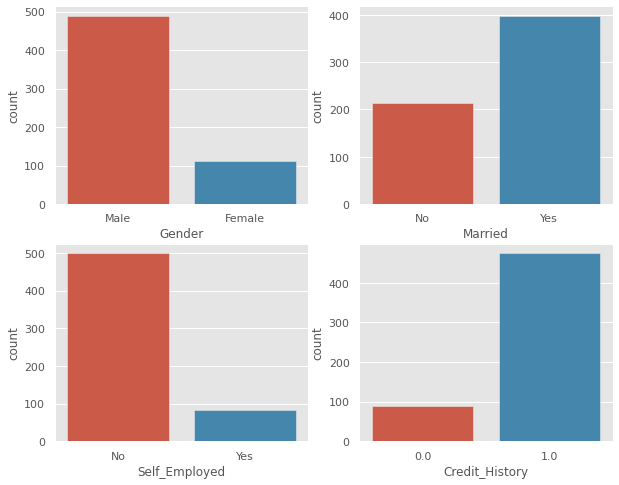

In [8]:
# Analyzing independent variable (Categorical)

plt.figure(figsize=(10,8))
plt.subplot(221)
sns.countplot(x='Gender',data=data)
# plt.title('Gender')
plt.subplot(222)
sns.countplot(x='Married',data=data)
# plt.title('Married')
plt.subplot(223)
sns.countplot(x='Self_Employed',data=data)
# plt.title('Self_Employed')
plt.subplot(224)
sns.countplot(x='Credit_History',data=data)
# plt.title('Credit_History')
plt.show()

### Observations from above plots:
1. Nearly 80% of the applicants in dataset are Male.
2. Nearly 65% of the applicants in dataset are Married.
3. Nearly 15% of the applicants in dataset are Self Employed. 
4. Nearly 85% of the applicants have repaid their debts.

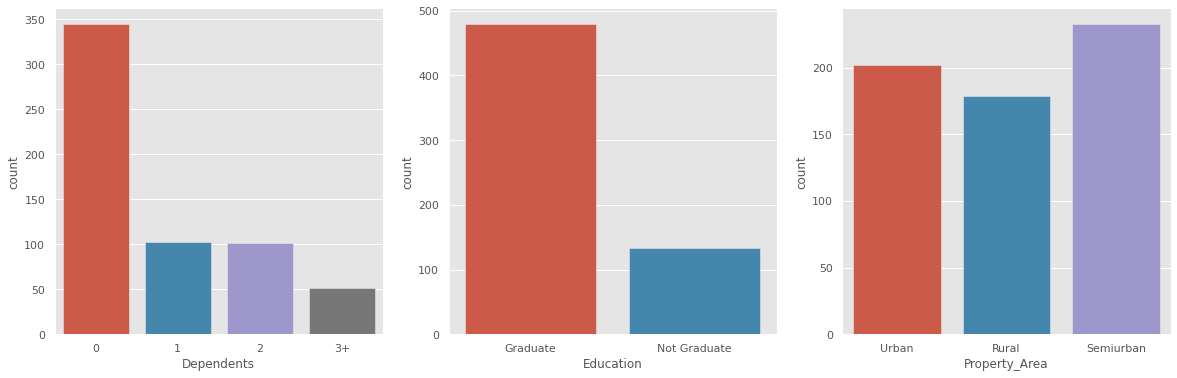

In [9]:
# Analyzing Independent variable (Ordinal)

plt.figure(figsize=(20,6))
plt.figure(num=1)
plt.subplot(131)
sns.countplot(x='Dependents', data=data)
plt.subplot(132)
sns.countplot(x='Education', data=data)
plt.subplot(133)
sns.countplot(x='Property_Area', data=data)
plt.show()

### Observations can be made from above barplots:
- Most of the applicants doesn't have any dependents.
- Around 80% of the applicants are Graduate.
- Most of the applicants are form Semi-Urban Area

## Numerical Analysis

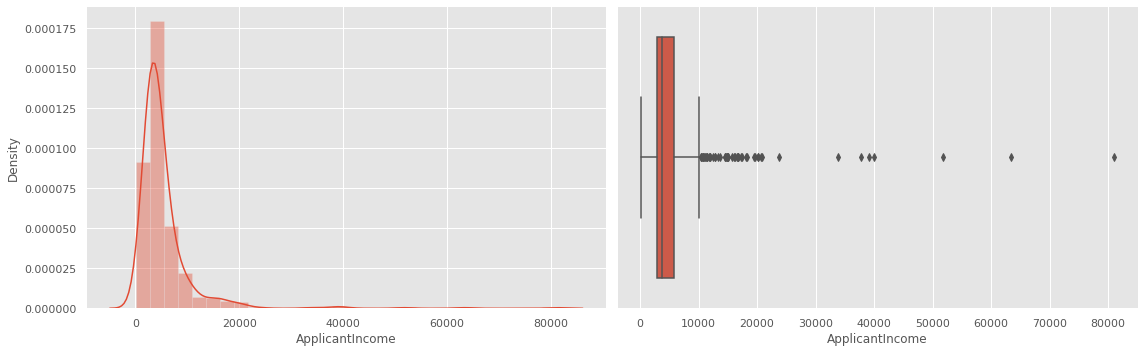

In [10]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.distplot(data['ApplicantIncome'],bins=30)
plt.subplot(122)
sns.boxplot(data['ApplicantIncome'])
plt.tight_layout()
plt.show()

### Observation:
- It can be inferred that most of the data in distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal later as algorithms works better if the dta is normally distributed.

- The boxplot confirms the presence of a lot of outliers/extreene values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. 

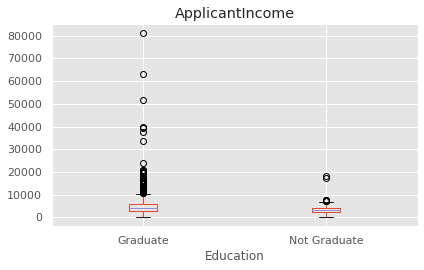

In [11]:
data.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle('')
plt.tight_layout()

- Grauduate people have high income than those who are Non-Graduate.

Let's see **ApplicantIncome** factor for **Marital Status and Employed type**

Text(0.5, 0.98, ' ')

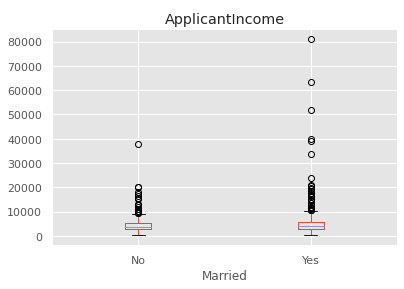

In [12]:
data.boxplot(column='ApplicantIncome', by='Married')
plt.suptitle(' ')

- Married applicants has large amout-range of income

Text(0.5, 0.98, ' ')

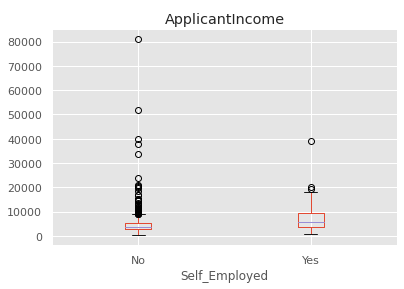

In [13]:
data.boxplot(column='ApplicantIncome', by='Self_Employed')
plt.suptitle(' ')

- Those are **Self-Employed** (business, freelancing, etc.) has lower income amount-range than applicants who are Employed.

### Observation:

Those who category who has high income range are also appearnig to be the outliers.

<Figure size 432x288 with 0 Axes>

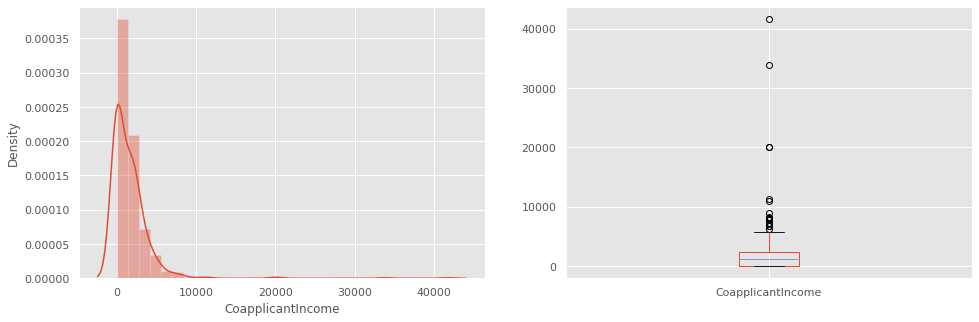

In [14]:
plt.figure(num=1)
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.distplot(data['CoapplicantIncome'],bins=30)
plt.subplot(122)
data.boxplot(column='CoapplicantIncome')
plt.show()

#### We see a similar distribution as that applicant income. Majority of coapplicant's income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

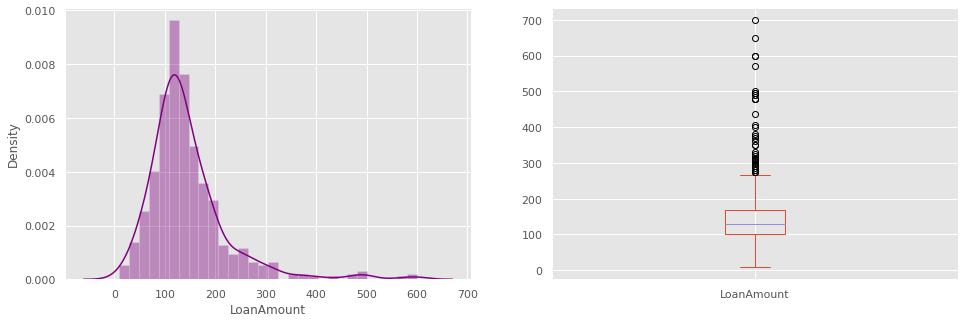

In [15]:
plt.figure(1)
plt.subplot(121)
# For better working it is necessary to drop null values
df = data.dropna()
sns.distplot(df['LoanAmount'],bins=30,color='purple')
plt.subplot(122)
data['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

#### We see a lot of outliers in **LoanAmount** is variable and the distribution is fairly normal.

## PairPlot
Pairplot will plot pairwise relationships across an entire dataframe(for the numerical columns only) and supports a colos hue argument(for categorical columns).

<Figure size 1296x1008 with 0 Axes>

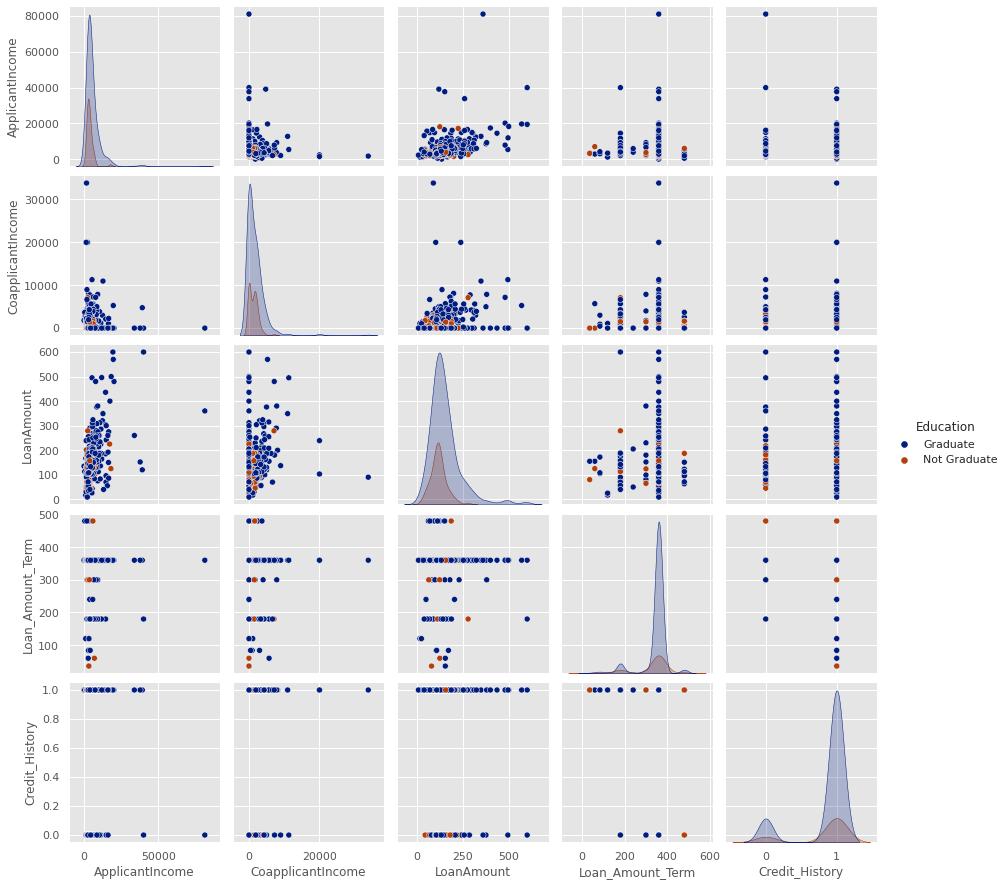

In [16]:
plt.figure(figsize=(18,14))
sns.pairplot(df,hue='Education', palette='dark')

## Bivariate Analysis
After looking at every variable individually in univariate analysis, we will now exolore them again with respect to the target variable, We would like to know how well each feature correlate with our target variable Loan Status.

## Categorical Independent Variable vs Target Variable
First of all we will find the relation between target variable and categorical variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans

In [17]:
Gender = pd.crosstab(index=data['Gender'],columns=data['Loan_Status'])
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


---
* _Crosstab_: A crosstab is a table showing the relationship between two or more variables. Where the table only shows the relationship between two categorical variables, a crosstab is also known as a contingency table.
---

In [18]:
Gender.sum(1).astype(float)

Gender
Female    112.0
Male      489.0
dtype: float64

In [19]:
female_Y = round((75/112)*100,2)
print("Percentage of Female applicants whose application is approved: {}%".format(female_Y))

Percentage of Female applicants whose application is approved: 66.96%


In [20]:
male_Y = round((339/489)*100,2)
print("Percentage of Male applicants whose application is approved: {}%".format(male_Y))

Percentage of Male applicants whose application is approved: 69.33%


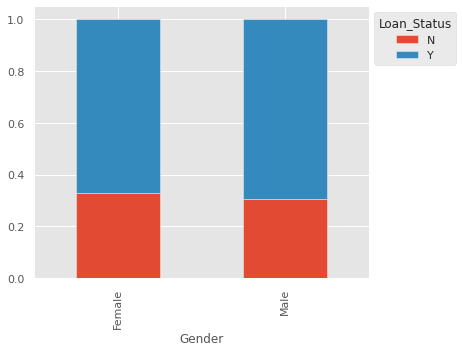

In [21]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,5))
plt.legend(loc = 'upper left',bbox_to_anchor= (1,1),title='Loan_Status')
plt.show()

---
###  It can be inferred that the proportion of male anf female applicants is more or less for both approved and unapproved loans.
---

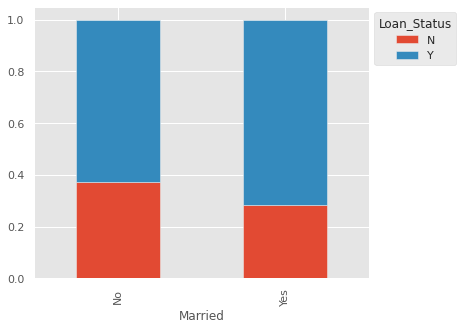

In [22]:
Married=pd.crosstab(data['Married'], data['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(6,5))
plt.legend(bbox_to_anchor=(1,1),loc='upper left', title='Loan_Status')
plt.show()

---
### Proportion of married applicants is higher for he approved loans.
---

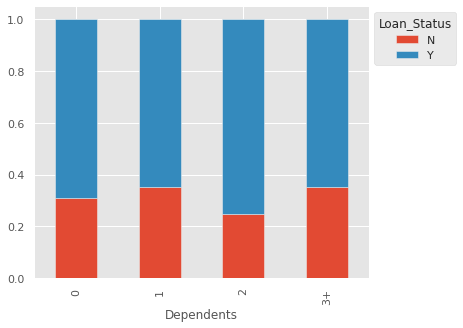

In [23]:
Dependents=pd.crosstab(data['Dependents'], data['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(6,5))
plt.legend(bbox_to_anchor=(1,1),loc='upper left', title='Loan_Status')
plt.show()

---
### Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
---

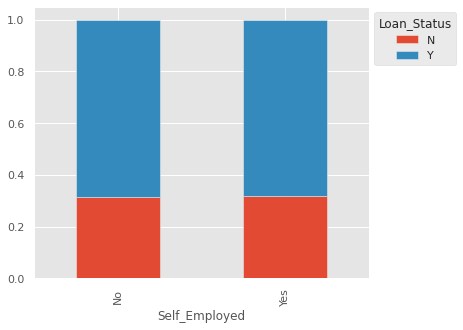

In [24]:
Self_Employed = pd.crosstab(data['Self_Employed'], data['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(6,5))
plt.legend(bbox_to_anchor=(1,1),loc='upper left',title='Loan_Status')
plt.show()

---
### Proportion of graduate applicants is higher for the approved loans. This is obivous beccause Graudate applicants fail into the higher income bracket.
---

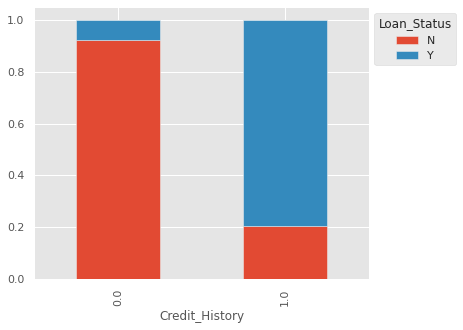

In [25]:
Credit_History = pd.crosstab(data['Credit_History'], data['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,5))
plt.legend(bbox_to_anchor=(1,1),loc='upper left',title='Loan_Status')
plt.show()

---
### 1. It seems poeple with credit history as 1 are more likely to get their loans approved.
### 2. Good credit history means good repayment capacity.
---

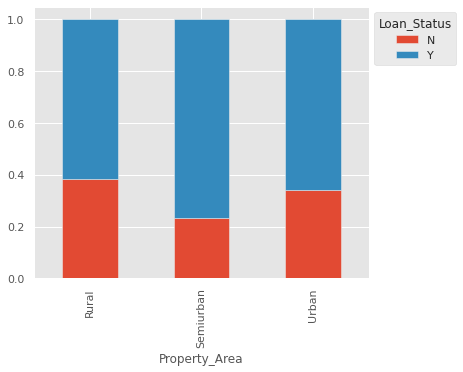

In [26]:
Property_Area = pd.crosstab(data['Property_Area'], data['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, figsize=(6,5))
plt.legend(bbox_to_anchor=(1,1),loc='upper left', title='Loan_Status')
plt.show()

---
### Proportion of loans getting approved in semiburn area is higher compared to that in rural or urban area.
---

## Numerical Independent Variable vs Target Variable
**ApplicantIncome vs Loan_Status**

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

In [27]:
data.groupby('Loan_Status').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,151.220994,344.064516,0.541899
Y,5384.068720,1504.516398,144.294404,341.072464,0.981818


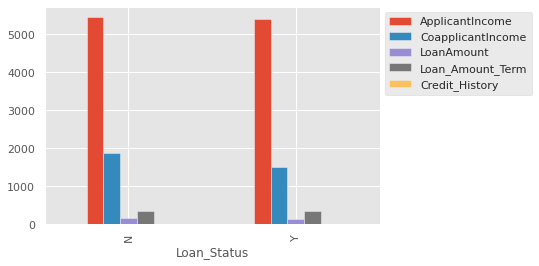

In [28]:
data.groupby('Loan_Status').mean().plot.bar()
plt.legend(bbox_to_anchor=(1,1),loc='upper left')

**Let's make bins for the applicant income variable based on the values in in and analyze the corresponding loan statys for each bin.**

In [29]:
data.groupby('Loan_Status')['ApplicantIncome'].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

In [30]:
bins = [0,2500,4000,6000,8100]
groups = ['Low', 'Average', 'High', 'Very High']

In [31]:
df.head(3) # dataframe without nan values
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [32]:
data['Income_groups'] = pd.cut(df['ApplicantIncome'],bins=bins,labels=groups)

In [33]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_groups
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High


In [34]:
data['Income_groups'].value_counts()

Average      174
High         111
Low           83
Very High     44
Name: Income_groups, dtype: int64

In [35]:
data[['ApplicantIncome', 'Income_groups', 'Loan_Status']].head(n=4)

,ApplicantIncome,Income_groups,Loan_Status
0,5849,NaN,Y
1,4583,High,N
2,3000,Average,Y
3,2583,Average,Y


In [36]:
# Pandas Crosstab function drops the NaN values by default
Income_groups = pd.crosstab(index=data['Income_groups'],columns=data['Loan_Status'])
Income_groups

Loan_Status,N,Y
Income_groups,,
Low,26,57
Average,51,123
High,32,79
Very High,15,29


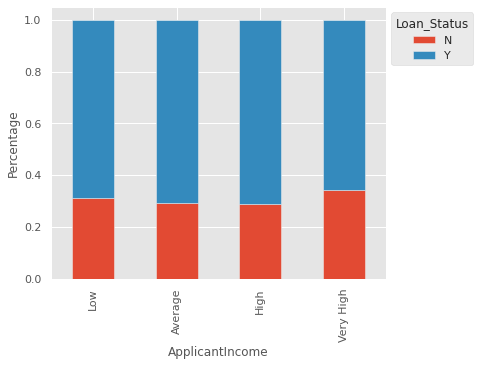

In [37]:
Income_groups.div(Income_groups.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, figsize=(6,5))
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.legend(loc='upper left', bbox_to_anchor=(1,1),title='Loan_Status')
plt.show()

---
#### We can see that Applicant Income does not affect the chances of loan approval which contradict our hypothesis in which we assumed that is the applicant income is hight the chances of gettig loan approval will also be high.

- Ho = Higher the Applicant Income higher chance of getting loan approval.(Null Hypothesis)

- Ha = Income will not affect the loan approval.(Alternate Hypothesis)

So, we are rejecting our **NULL HYPOTHESIS**

---

**Let's check same for the Coapplicant Income.**

In [38]:
bins = [0,1000,3000,4200]
groups = ['Low', 'Average', 'High']
data['coapplicant_income_groups'] = pd.cut(df['CoapplicantIncome'],bins,labels=groups)
data['coapplicant_income_groups'].value_counts()

Average    169
High        37
Low         18
Name: coapplicant_income_groups, dtype: int64

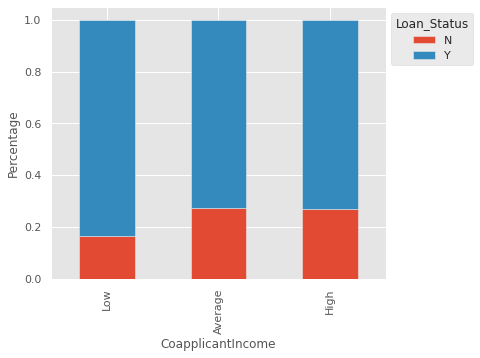

In [39]:
Coapplicant_income_groups = pd.crosstab(index=data['coapplicant_income_groups'],columns=data['Loan_Status'])
Coapplicant_income_groups.div(Coapplicant_income_groups.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,5))
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),title='Loan_Status')
plt.show()

---
#### It shows that if appliceant's income is less then chances of loan approval is high. But this does not look right. The possible reason behind this may be that most of the applicants don't have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant's and coapplicant's income to visualize the combined effect of income on loan approval.
---

In [40]:
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']

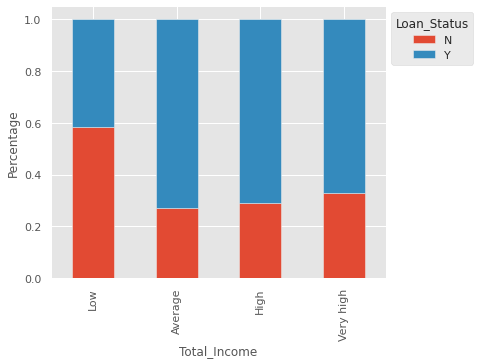

In [41]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
data['Total_Income_groups']=pd.cut(data['Total_Income'],bins,labels=group)
Total_Income_groups=pd.crosstab(index=data['Total_Income_groups'],columns=data['Loan_Status'])
Total_Income_groups.div(Total_Income_groups.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(6,5))
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),title='Loan_Status')
plt.show()

---
#### We can now see that proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.
---

## LoanAmount vs Loan_Status

In [42]:
data['LoanAmount'].isnull().sum()

22

In [43]:
data['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

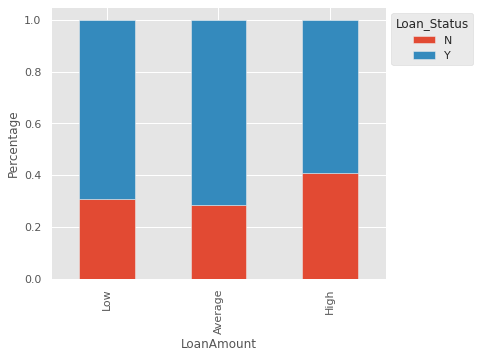

In [44]:
bins=[0,100,200,700]
groups=['Low','Average','High']
data['LoanAmount_groups'] = pd.cut(x=df['LoanAmount'],bins=bins,labels=groups)
LoanAmount_groups = pd.crosstab(index=data['LoanAmount_groups'],columns=data['Loan_Status'])
LoanAmount_groups.div(LoanAmount_groups.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,5))
plt.legend(loc='upper left',bbox_to_anchor=(1,1),title='Loan_Status')
plt.xlabel('LoanAmount')
p=plt.ylabel('Percentage')
plt.show()

---
### It can be inferred that the proportions of Loan Approval is higher for the Low & Average Loan Amount as compared to higher Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.
---

## Data Cleaning and preparation.

In [45]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_groups', 'coapplicant_income_groups', 'Total_Income',
       'Total_Income_groups', 'LoanAmount_groups'],
      dtype='object')

In [47]:
data = data.drop(labels=['Income_groups', 'coapplicant_income_groups','Total_Income','Total_Income_groups','LoanAmount_groups'],axis=1)

In [48]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### We will change the values '3+' in 'Dependents' variable to 3 to make it a numerical variable. We will make this change in both train and test sets.

In [49]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [50]:
data['Dependents'].replace('3+',3,inplace=True)

In [51]:
data['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

### We will convert target variable's ('Loan Status') categories into 0 and 1 so that we can find its correlation with numerical varibales

- We will replace N with 0 and Y with 1.


In [53]:
data['Loan_Status'].replace('N',0,inplace=True)
data['Loan_Status'].replace('Y',1,inplace=True)

In [54]:
data['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [55]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

## Correlation between all the Numeric Variables.
- Heatmap is used to visualize the correlation

In [56]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


<AxesSubplot:>

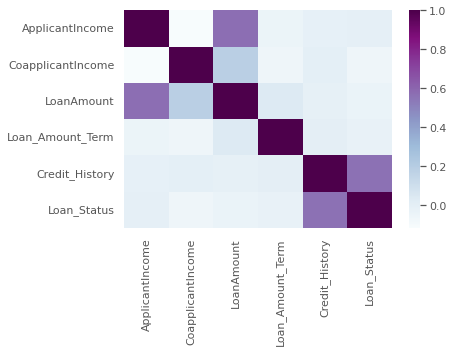

In [58]:
sns.heatmap(data=data.corr(), square=False,cmap='BuPu')

### It can be infered that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is correlated with CoapplicantIncome.

We can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

In [59]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in many columns. 
We can consider following methods to fill the missing values

- For numerical variables: imputation using mean or median
- For categorical variables: imputation using mode

In [60]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [61]:
data['Gender'].describe()

count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object

In [62]:
data['Gender'].mode()

0    Male
dtype: object

In [63]:
data['Gender'].mode()[0]

'Male'

In [64]:
# imputinig the missing values using the mode of gender features
data['Gender'].fillna(value=data['Gender'].mode()[0],inplace=True)

In [65]:
# after imputation
data['Gender'].isnull().sum()

0

In [66]:
# check the value_counts and unique count
data['Gender'].describe()

count      614
unique       2
top       Male
freq       502
Name: Gender, dtype: object

#### Similarly we impute missing values with mode for others

In [69]:
data['Married'].fillna(data['Married'].mode()[0],inplace= True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace= True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace= True)

#### Although the credit_history is a numeric feature but the values in it are binary (1 or 0), so we will use the "mode" to imput these values

In [70]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [71]:
data['Credit_History'].mode()[0]

1.0

In [72]:
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

### Now we wil impute the missing values for the numeric features 'LoaAmount'and 'Loan_Amount_Term'.

In [73]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [74]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

#### We can seen that the value of 360 is repeating the most in Loan_Amount_Term variable, so we will use the mode of this variable to replace the missing values.

In [75]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)

In [76]:
data['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

### We can see that the 'LoanAmount' feature is highly affected by the presence of lot of outliers, so replacing the missing values by the mean() of the feature will not be the correct approach here.

### Thus to impute these missing values we will use the median() of the feature.

In [77]:
data['LoanAmount'].median()

128.0

In [78]:
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)

In [79]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64